In [5]:
import os
import numpy as np
import pandas as pd

from copy import deepcopy

PATH = "./N1k5test50/"

techniques = [x for x in os.listdir(PATH) if "simplelstm" in x]
tpaths = [PATH + x for x in techniques]

RES = []
LOSS = dict()
for technique, tdir in zip(techniques, tpaths):
    #print(technique)
    if technique.count("e") > 1:
        avg_cell,hsize,T,loss_type,mbs,nlayers,lr,lrrest = technique.split('-')[1:]
        lr = lr + '-' + lrrest
    else:
        avg_cell,hsize,T,loss_type,mbs,nlayers,lr = technique.split('-')[1:]
    
    avg_cell = True if avg_cell == "avg" else False
    hsize = int(hsize); T = int(T); mbs = int(mbs); nlayers = int(nlayers); lr = float(lr)
#     print(avg_cell,hsize,T,loss_type,mbs,nlayers,lr)
#     print(tdir)
    tfile = tdir + "/-runs/" 
    try:
        tfile = tfile + [x for x in os.listdir(tfile) if "alltestperf" in x][0]
    except:
        print(f"No test perf file found for {technique}")
    
    data = pd.read_csv(tfile, header=None).to_numpy().reshape(-1)
    mean_perf, std_perf = data.mean(), data.std()
    
    RES.append([avg_cell,hsize,T,loss_type,mbs,nlayers,lr,mean_perf,std_perf])
    LOSS[(avg_cell,hsize,T,loss_type,mbs,nlayers,lr)] = deepcopy(data)
    
    

In [12]:
df = pd.DataFrame(RES)
df.columns = "avg_cell,hsize,T,loss_type,mbs,nlayers,lr,mean_perf,std_perf".split(',')
df.sort_values("mean_perf")

,avg_cell,hsize,T,loss_type,mbs,nlayers,lr,mean_perf,std_perf
67,False,40,10,post,4,4,0.004321,0.027952,0.075294
27,True,40,10,post,4,4,0.004321,0.033418,0.089543
17,True,20,9,post,2,4,0.007002,0.040176,0.378112
57,False,20,9,post,2,4,0.007002,0.040211,0.097935
73,False,40,4,post,4,2,0.004674,0.040603,0.091951
...,...,...,...,...,...,...,...,...,...
46,False,1,6,multi,3,1,0.002772,4.180302,3.657878
9,True,1,9,post,3,1,0.000013,4.531891,3.795164
49,False,1,9,post,3,1,0.000013,4.552914,3.791707
8,True,1,9,multi,3,1,0.000013,4.611537,3.832153


In [ ]:
python -u main.py --problem sine --model simplelstm --N 1 --k 5 --k_test 50 --runs 3 --val_after 2500 --cpu --hidden_size 40 --T 10 --validate --loss_type post --meta_batch_size 4 --num_layers 4 --lr 0.004321072194838596 --model_spec best-simplelstm

# Best: 

False-40-10-post-4-4-0.004321072194838596

In [16]:
import numpy as np, scipy.stats as st

a = LOSS[(False,40,10,"post",4,4,0.004321072194838596)] # 6k = 2k (per seed) * 3 runs


lb, ub = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
ci = a.mean() - lb
print(a.mean(), ci)

0.02795232649506453 0.0019057077288892159


## Marginals

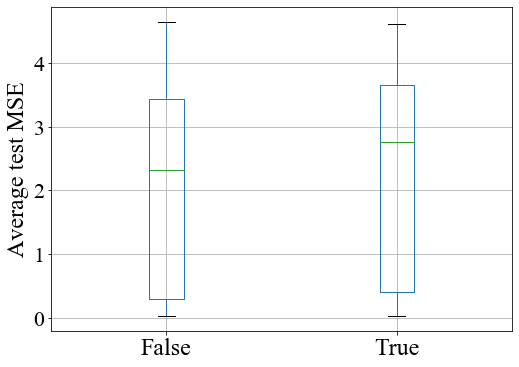

In [4]:
## Presence of previous target

# with_avg = df[df["labelinput"]==True]["avg_testperf"].mean()
# without_avg = df[df["labelinput"]!=True]["avg_testperf"].mean()
# with_std = df[df["labelinput"]==True]["avg_testperf"].std()
# without_std = df[df["labelinput"]!=True]["avg_testperf"].std()
# plt.bar(range(2),[without_avg,with_avg], yerr=[without_std, with_std])
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Times New Roman']})
rc('text', usetex=False)
df.boxplot(column=["mean_perf"], by="avg_cell",figsize=(8,6))
#plt.xlabel("Number of training steps per task", fontsize=18)
plt.ylabel("Average test MSE",fontsize=24)
plt.title("")
plt.suptitle("")
plt.xlabel("")
plt.yticks(fontsize=22)
plt.xticks(fontsize=24)
plt.savefig("avgcellstate.pdf")
#plt.yscale('log')


c:\users\intel\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([1, 2, 3, 4, 5]), <a list of 5 Text xticklabel objects>)

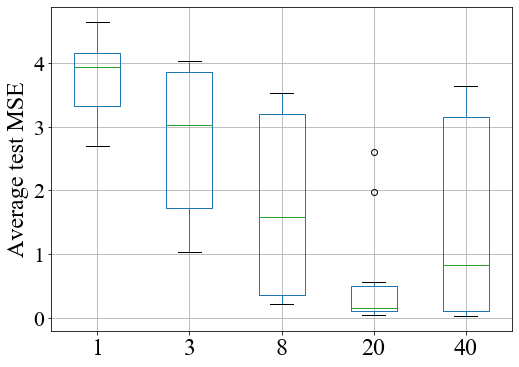

In [26]:
df.boxplot(column=["mean_perf"], by="hsize",figsize=(8,6))
#plt.xlabel("Number of training steps per task", fontsize=18)
plt.ylabel("Average test MSE",fontsize=24)
plt.title("")
plt.suptitle("")
plt.xlabel("")
plt.yticks(fontsize=22)
plt.xticks(fontsize=24)

c:\users\intel\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Text xticklabel objects>)

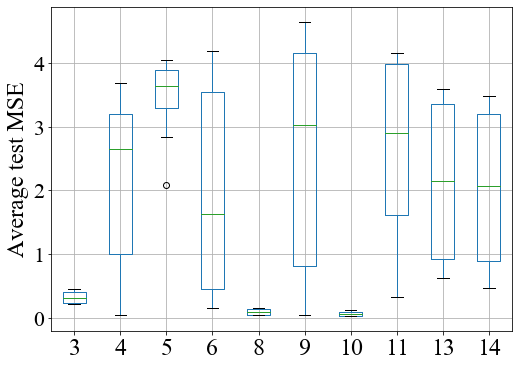

In [27]:
df.boxplot(column=["mean_perf"], by="T",figsize=(8,6))
#plt.xlabel("Number of training steps per task", fontsize=18)
plt.ylabel("Average test MSE",fontsize=24)
plt.title("")
plt.suptitle("")
plt.xlabel("")
plt.yticks(fontsize=22)
plt.xticks(fontsize=24)

(array([1, 2]), <a list of 2 Text xticklabel objects>)

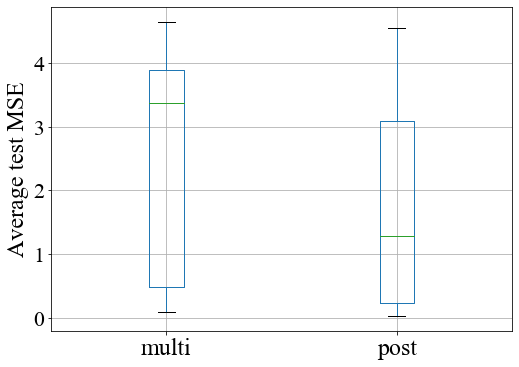

In [28]:
df.boxplot(column=["mean_perf"], by="loss_type",figsize=(8,6))
#plt.xlabel("Number of training steps per task", fontsize=18)
plt.ylabel("Average test MSE",fontsize=24)
plt.title("")
plt.suptitle("")
plt.xlabel("")
plt.yticks(fontsize=22)
plt.xticks(fontsize=24)

c:\users\intel\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(array([1, 2, 3, 4]), <a list of 4 Text xticklabel objects>)

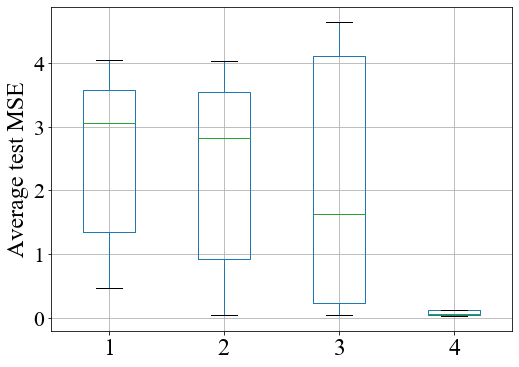

In [32]:
df.boxplot(["mean_perf"], by="mbs",figsize=(8,6))
#plt.xlabel("Number of training steps per task", fontsize=18)
plt.ylabel("Average test MSE",fontsize=24)
plt.title("")
plt.suptitle("")
plt.xlabel("")
plt.yticks(fontsize=22)
plt.xticks(fontsize=24)

(array([-0.01 , -0.005,  0.   ,  0.005,  0.01 ,  0.015,  0.02 ,  0.025,
         0.03 ,  0.035,  0.04 ]),
 <a list of 11 Text xticklabel objects>)

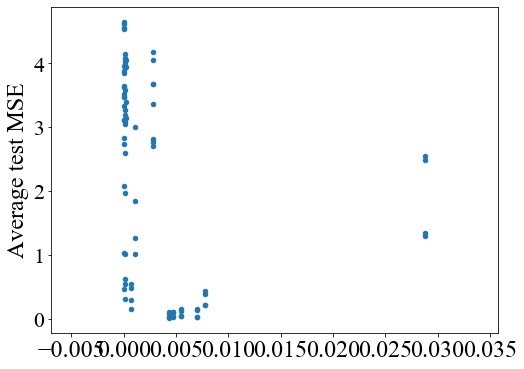

In [37]:
df.plot.scatter("lr","mean_perf",figsize=(8,6))
#plt.xlabel("Number of training steps per task", fontsize=18)
plt.ylabel("Average test MSE",fontsize=24)
plt.title("")
plt.suptitle("")
plt.xlabel("")
plt.yticks(fontsize=22)
plt.xticks(fontsize=24)

# MAML

In [1]:
import os
import numpy as np
import pandas as pd

from copy import deepcopy

PATH = "./N1k5test50/"

techniques = [x for x in os.listdir(PATH) if "somaml" in x and not "tanh" in x]
tpaths = [PATH + x for x in techniques]

RES = []
LOSS = dict()
for technique, tdir in zip(techniques, tpaths):
    #print(technique)
    if technique.count('e') >= 1:
        T,mbs,lr,rest,baselr = technique.split('-')[1:]
        lr = lr + '-' + rest
    else:
        T,mbs,lr,baselr = technique.split('-')[1:]
    
    T = int(T); mbs = int(mbs); lr = float(lr); baselr = float(baselr)

    tfile = tdir + "/-runs/" 
    try:
        tfile = tfile + [x for x in os.listdir(tfile) if "alltestperf" in x][0]
    except:
        print(f"No test perf file found for {technique}")
        continue
    
    data = pd.read_csv(tfile, header=None).to_numpy().reshape(-1)
    mean_perf, std_perf = data.mean(), data.std()
    
    RES.append([T,mbs,lr,baselr,mean_perf,std_perf])
    LOSS[(T,mbs,lr,baselr)] = deepcopy(data)
    
    

No test perf file found for somaml-11-3-0.00016098550271858659-0.0806914330824089
No test perf file found for somaml-12-3-0.007186485241628563-0.001075834756143196
No test perf file found for somaml-2-3-0.0015687342586992938-0.3411927201467858
No test perf file found for somaml-2-3-2.8294961999071007e-05-0.028892735184616436
No test perf file found for somaml-3-3-0.00776573116016386-0.04319144896480553
No test perf file found for somaml-5-3-0.028084413382556312-0.13091164928357987
No test perf file found for somaml-6-3-0.00018097932615180606-0.00331211275384862
No test perf file found for somaml-6-3-0.004440384965418705-0.001089963730201143
No test perf file found for somaml-7-3-6.95530587573294e-05-0.023032915758808364
No test perf file found for somaml-8-3-0.0010353826083192381-0.020562808071236855
No test perf file found for somaml-9-3-1.3254610570097222e-05-0.02233002546142602


In [2]:
df = pd.DataFrame(RES)
df.columns = "T,mbs,lr,baselr,mean_perf,std_perf".split(',')
df.sort_values("mean_perf")

,T,mbs,lr,baselr,mean_perf,std_perf
9,14,2,0.003294,0.003769,0.256199,0.469722
7,13,2,0.001623,0.009072,0.293768,0.517471
4,11,2,0.001876,0.001018,0.298807,0.513262
28,9,2,0.007002,0.008710,0.304012,0.527417
26,9,1,0.001045,0.005293,0.311093,0.516396
8,13,4,0.003697,0.017785,0.321718,0.547026
22,5,2,0.000996,0.006982,0.390220,0.629210
18,4,4,0.004674,0.014233,0.412974,0.633795
17,4,2,0.000830,0.004888,0.420344,0.630329
19,4,4,0.010261,0.004895,0.441371,0.645455


In [11]:
df.iloc[9]["lr"]

0.0032937018686863585

## Best

In [12]:
import os
import numpy as np
import pandas as pd
import scipy.stats as st

from copy import deepcopy

PATH = "./N1k5test50/"

techniques = [x for x in os.listdir(PATH) if "somaml" in x and "tanh" in x]
tpaths = [PATH + x for x in techniques]

RES = []
LOSS = dict()
for technique, tdir in zip(techniques, tpaths):
    tfile = tdir + "/-runs/" 
    try:
        tfile = tfile + [x for x in os.listdir(tfile) if "alltestperf" in x][0]
    except:
        print(f"No test perf file found for {technique}")
        continue
    
    a = data = pd.read_csv(tfile, header=None).to_numpy().reshape(-1)
    mean_perf, std_perf = data.mean(), data.std()
    
    lb, ub = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
    ci = a.mean() - lb
    print(a.mean(), ci)
    
    

0.29457739236714164 0.010658910724164361


In [ ]:
python -u main.py --problem sine --model maml --second_order --N 1 --k 5 --k_test 50 --runs 3 --val_after 2500 --cpu --T 14 --validate --meta_batch_size 2 --lr 0.0032937018686863585 --base_lr 0.003769030557807799 --model_spec somaml-best-tanh --use_tanh

## MAML TANH

In [ ]:
tfile = tdir + "/-runs/" 
try:
    tfile = tfile + [x for x in os.listdir(tfile) if "alltestperf" in x][0]
except:
    print(f"No test perf file found for {technique}")
    continue

data = pd.read_csv(tfile, header=None).to_numpy().reshape(-1)
mean_perf, std_perf = data.mean(), data.std()

In [3]:
def quadratic_solve(num_layers, num_params):
    a = num_layers-1
    b = num_layers+2
    c = -num_layers+1

    sol1 = (-b + (b**2 - 4*a*c)**0.5)/2*a
    sol2 = (-b - (b**2 - 4*a*c)**0.5)/2*a
    return sol1, sol2

quadratic_solve(2, 46441)

(0.2360679774997898, -4.23606797749979)

In [5]:
for n_layers in [1,2,3,4,5,6]:
    best_fit = float("inf")
    best_h = None
    for h in range(1, 20201):
        num_params = h*(n_layers+2) + h**2 * (n_layers-1) + 1
        mse = (num_params - 20201)**2
        if mse < best_fit:
            best_fit = mse
            best_h = h
    print("Num layers:", n_layers, "hidden size:", best_h, "with MSE:", best_fit)

Num layers: 1 hidden size: 6733 with MSE: 1
Num layers: 2 hidden size: 140 with MSE: 1600
Num layers: 3 hidden size: 99 with MSE: 10609
Num layers: 4 hidden size: 81 with MSE: 961
Num layers: 5 hidden size: 70 with MSE: 12100
Num layers: 6 hidden size: 63 with MSE: 22201


In [6]:
lses = [[140]*2,
        [99]*3,
        [81]*4,
        [70]*5,
        [63]*6,
       ]
lses

[[140, 140],
 [99, 99, 99],
 [81, 81, 81, 81],
 [70, 70, 70, 70, 70],
 [63, 63, 63, 63, 63, 63]]

### MAML with same Number of Parameters

python -u main.py --problem sine --model maml --second_order --N 1 --k 5 --k_test 50 --runs 3 --val_after 2500 --cpu --T 14 --validate --meta_batch_size 2 --lr 0.0032937018686863585 --base_lr 0.003769030557807799 --model_spec somaml-best-hsize214 --hdims [214,214]


python -u main.py --problem sine --model maml --second_order --N 1 --k 5 --k_test 50 --runs 3 --val_after 2500 --cpu --T 14 --validate --meta_batch_size 2 --lr 0.0032937018686863585 --base_lr 0.003769030557807799 --model_spec somaml-best-hsize150 --hdims [150,150,150]


python -u main.py --problem sine --model maml --second_order --N 1 --k 5 --k_test 50 --runs 3 --val_after 2500 --cpu --T 14 --validate --meta_batch_size 2 --lr 0.0032937018686863585 --base_lr 0.003769030557807799 --model_spec somaml-best-hsize123 --hdims [123,123,123,123]


python -u main.py --problem sine --model maml --second_order --N 1 --k 5 --k_test 50 --runs 3 --val_after 2500 --cpu --T 14 --validate --meta_batch_size 2 --lr 0.0032937018686863585 --base_lr 0.003769030557807799 --model_spec somaml-best-hsize105 --hdims [105,105,105,105,105]


python -u main.py --problem sine --model maml --second_order --N 1 --k 5 --k_test 50 --runs 3 --val_after 2500 --cpu --T 14 --validate --meta_batch_size 2 --lr 0.0032937018686863585 --base_lr 0.003769030557807799 --model_spec somaml-best-hsize96 --hdims [96,96,96,96,96,96]



**20K params**

python -u main.py --problem sine --model maml --second_order --N 1 --k 5 --k_test 50 --runs 3 --val_after 2500 --cpu --T 14 --validate --meta_batch_size 2 --lr 0.0032937018686863585 --base_lr 0.003769030557807799 --model_spec somaml-best-hsize140 --hdims [140,140]

python -u main.py --problem sine --model maml --second_order --N 1 --k 5 --k_test 50 --runs 3 --val_after 2500 --cpu --T 14 --validate --meta_batch_size 2 --lr 0.0032937018686863585 --base_lr 0.003769030557807799 --model_spec somaml-best-hsize91 --hdims [91,91,91]

python -u main.py --problem sine --model maml --second_order --N 1 --k 5 --k_test 50 --runs 3 --val_after 2500 --cpu --T 14 --validate --meta_batch_size 2 --lr 0.0032937018686863585 --base_lr 0.003769030557807799 --model_spec somaml-best-hsize81 --hdims [81,81,81,81]

python -u main.py --problem sine --model maml --second_order --N 1 --k 5 --k_test 50 --runs 3 --val_after 2500 --cpu --T 14 --validate --meta_batch_size 2 --lr 0.0032937018686863585 --base_lr 0.003769030557807799 --model_spec somaml-best-hsize70 --hdims [70,70,70,70,70]

python -u main.py --problem sine --model maml --second_order --N 1 --k 5 --k_test 50 --runs 3 --val_after 2500 --cpu --T 14 --validate --meta_batch_size 2 --lr 0.0032937018686863585 --base_lr 0.003769030557807799 --model_spec somaml-best-hsize63 --hdims [63,63,63,63,63,63]





In [1]:
import os
import numpy as np
import pandas as pd
import scipy.stats as st

from copy import deepcopy

PATH = "./N1k5test50/"

techniques = [x for x in os.listdir(PATH) if "somaml-best-hsize" in x and not "tanh" in x]
tpaths = [PATH + x for x in techniques]

RES = []
LOSS = dict()
for technique, tdir in zip(techniques, tpaths):
    tfile = tdir + "/-runs/" 
    try:
        tfile = tfile + [x for x in os.listdir(tfile) if "alltestperf" in x][0]
    except:
        print(f"No test perf file found for {technique}")
        continue
    
    data = pd.read_csv(tfile, header=None).to_numpy().reshape(-1)
    mean_perf, std_perf = data.mean(), data.std()
    a = data
    lb, ub = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
    ci = a.mean() - lb

    print(technique, mean_perf, ci)
    

somaml-best-hsize105 0.3222072458587354 0.01581404623056909
somaml-best-hsize123 0.22017914895606616 0.012917800951364328
somaml-best-hsize140 0.26500790307375915 0.011886344223693446
somaml-best-hsize150 0.21473363356132177 0.013188122191938045
somaml-best-hsize152 0.2078820675952593 0.012934869789312103
somaml-best-hsize214 0.2586650345682671 0.012645648666058495
somaml-best-hsize63 0.2857196125561216 0.013633857654410442
somaml-best-hsize70 0.2773164764494092 0.01506314820056276
somaml-best-hsize81 0.21596607483923436 0.01216017958030427
somaml-best-hsize91 0.17653166841748558 0.009424709234501755
somaml-best-hsize96 0.3016229424799676 0.01582440797562029


**best with 20k:** 0.17653166841748558

python -u main.py --problem sine --model maml --second_order --N 1 --k $1 --k_test 50 --runs 3 --val_after 2500 --cpu --T 14 --validate --meta_batch_size 2 --lr 0.0032937018686863585 --base_lr 0.003769030557807799 --model_spec somaml-best-hsize91 --hdims [91,91,91]

**best OPLSTM**

python -u main.py --problem sine --model oplstm --second_order --N 1 --k $1 --k_test 50 --runs 3 --val_after 2500 --cpu --validate --meta_batch_size 1 --lr 0.0010448688371510757 --model_spec oplstm-70k-best --layers 5,5,1 --hidden_size 1 --T 9 --elwise --learn_init_weight --lstm_inputs target_pred --hdims [91,91,91]  --gamma 0.025

oplstm-70k-9_1_0.0010448688371510757


oplstm-70k-

In [5]:
import os
import numpy as np
import pandas as pd
import scipy.stats as st

from copy import deepcopy

ks=[5,10,20]
for k in ks:
    PATH = f"./N1k{k}test50/"
    print('k=', k)
    techniques = [x for x in os.listdir(PATH) if x=="oplstm-70k-best" or "somaml-best-hsize91"==x]
    tpaths = [PATH + x for x in techniques]

    RES = []
    LOSS = dict()
    for technique, tdir in zip(techniques, tpaths):
        tfile = tdir + "/-runs/" 
        try:
            tfile = tfile + [x for x in os.listdir(tfile) if "alltestperf" in x][0]
        except:
            print(f"No test perf file found for {technique}")
            continue

        data = pd.read_csv(tfile, header=None).to_numpy().reshape(-1)
        mean_perf, std_perf = data.mean(), data.std()
        a = data
        lb, ub = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
        ci = a.mean() - lb

        print(technique, mean_perf, ci)
    print('-'*40)
    

k= 5
oplstm-70k-best 0.10540017640795361 0.009046934041056318
somaml-best-hsize91 0.17653166841748558 0.009424709234501755
----------------------------------------
k= 10
oplstm-70k-best 0.007567328537161858 0.0007291992200608808
somaml-best-hsize91 0.032948145922263646 0.0029543869715054037
----------------------------------------
k= 20
oplstm-70k-best 0.002690515086822366 0.00015408945801454995
somaml-best-hsize91 0.004867439069036917 0.0005119710979965796
----------------------------------------


In [1]:
import os
import numpy as np
import pandas as pd
import scipy.stats as st

from copy import deepcopy

PATH = "./N1k5test50/"

techniques = [x for x in os.listdir(PATH) if "oplstm-70k-" in x]
tpaths = [PATH + x for x in techniques]

RES = []
LOSS = dict()
for technique, tdir in zip(techniques, tpaths):
    tfile = tdir + "/-runs/" 
    try:
        tfile = tfile + [x for x in os.listdir(tfile) if "alltestperf" in x][0]
    except:
        print(f"No test perf file found for {technique}")
        continue
    
    data = pd.read_csv(tfile, header=None).to_numpy().reshape(-1)
    mean_perf, std_perf = data.mean(), data.std()
    a = data
    lb, ub = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
    ci = a.mean() - lb

    print(technique, mean_perf, ci)
    

oplstm-70k-10_4_0.004321072194838596 0.15160826746048406 0.019987871452182726
oplstm-70k-11_2_0.00010893507255537653 0.6418807565439493 0.046824309618950455
oplstm-70k-11_3_0.00016098550271858659 0.5310032525672578 0.0412005119382538
oplstm-70k-13_2_9.011400868236316e-05 0.7178243235051632 0.049709497475738496
oplstm-70k-14_1_3.216361796021737e-05 2.007132756950334 0.08887234024566881
oplstm-70k-1_4_0.001 0.27043028025561944 0.01811830832963246
oplstm-70k-3_3_0.00776573116016386 0.2629081170097925 0.01923562329807013
oplstm-70k-4_1_0.028790052229093227 3.079205520745367 0.12940093901017669
oplstm-70k-4_2_0.002770576962134859 0.0798188144410087 0.007708032593636588
oplstm-70k-4_2_4.64820226097604e-05 2.693114103231579 0.12064032756220255
oplstm-70k-4_4_0.004673978383086751 0.13428212784731294 0.01367364771630658
oplstm-70k-5_1_0.00023584798464763238 0.08637373695452695 0.008388930865469782
oplstm-70k-5_1_2.092886487381084e-05 2.857184988634661 0.12300520722176556
oplstm-70k-5_2_2.858551

In [9]:
h=152; n_layers=3
num_params = h*(n_layers+2) + h**2 * (n_layers-1) + 1
num_params

46969

### 10-shot, 20-shot

python -u main.py --problem sine --model simplelstm --N 1 --k 10 --k_test 50 --runs 3 --val_after 2500 --cpu --hidden_size 40 --T 10 --validate --loss_type post --meta_batch_size 4 --num_layers 4 --lr 0.004321072194838596 --model_spec best-simplelstm

python -u main.py --problem sine --model simplelstm --N 1 --k 20 --k_test 50 --runs 3 --val_after 2500 --cpu --hidden_size 40 --T 10 --validate --loss_type post --meta_batch_size 4 --num_layers 4 --lr 0.004321072194838596 --model_spec best-simplelstm


python -u main.py --problem sine --model maml --second_order --N 1 --k 10 --k_test 50 --runs 3 --val_after 2500 --cpu --T 14 --validate --meta_batch_size 2 --lr 0.0032937018686863585 --base_lr 0.003769030557807799 --model_spec somaml-best-hsize150 --hdims [150,150,150]

python -u main.py --problem sine --model maml --second_order --N 1 --k 20 --k_test 50 --runs 3 --val_after 2500 --cpu --T 14 --validate --meta_batch_size 2 --lr 0.0032937018686863585 --base_lr 0.003769030557807799 --model_spec somaml-best-hsize150 --hdims [150,150,150]




In [2]:
import os
import numpy as np
import pandas as pd
import scipy.stats as st

from copy import deepcopy


for PATH in ["./N1k10test50/", "./N1k20test50/"]:
    print('-'*40)
    print(PATH)
    

    techniques = [x for x in os.listdir(PATH)]
    tpaths = [PATH + x for x in techniques]

    RES = []
    LOSS = dict()
    for technique, tdir in zip(techniques, tpaths):
        tfile = tdir + "/-runs/" 
        try:
            tfile = tfile + [x for x in os.listdir(tfile) if "alltestperf" in x][0]
        except:
            print(f"No test perf file found for {technique}")
            continue

        data = pd.read_csv(tfile, header=None).to_numpy().reshape(-1)
        mean_perf, std_perf = data.mean(), data.std()
        a = data
        lb, ub = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
        ci = a.mean() - lb

        print(technique, mean_perf, ci)
    

----------------------------------------
./N1k10test50/
best-simplelstm 0.008404746749707507 0.00046903388532092485
somaml-best-hsize150 0.028202192792758627 0.002200949292832894
----------------------------------------
./N1k20test50/
best-simplelstm 0.00418519864762003 0.0001259638691781138
somaml-best-hsize150 0.004728589221764753 0.00043627250286745224


# Different inputs 



python -u main.py --problem sine --model simplelstm --N 1 --k 5 --k_test 50 --runs 3 --val_after 2500 --cpu --hidden_size $1 --T $2 --validate --loss_type post --meta_batch_size $4 --num_layers $5 --lr $6 --model_spec simplelstm-inputs-$1-$2-$3-$4-$5-$6 --lstm_inputs $3

python -u main.py --problem sine --model simplelstm --N 1 --k 5 --k_test 50 --runs 3 --val_after 2500 --cpu --hidden_size 8 --T 1 --validate --loss_type post --meta_batch_size 1 --num_layers 4 --lr 0.00025 --model_spec simplelstm-inputstest --lstm_inputs currtarget


#!/bin/bash

Ts=(9 9 11 3 4 9 5 9 14 4 6 10 5 4 4 6 13 5 11 8 1 1)
Lrs=(0.0010448688371510757 1.3254610570097222e-05 0.00016098550271858659 0.00776573116016386 0.004673978383086751 0.007002448809789397 0.00023584798464763238 0.00010914286603608817 3.216361796021737e-05 4.64820226097604e-05 0.0006538281143115779 0.004321072194838596 2.8585518456486535e-05 0.002770576962134859 0.028790052229093227 0.0027719328599832087 9.011400868236316e-05 2.092886487381084e-05 0.00010893507255537653 0.005462569008912091 0.001 0.001)
Nlayers=(4 1 4 3 2 4 1 1 3 3 3 4 2 4 2 1 1 3 3 3 3 4)
Mbs=(1 3 3 3 4 2 1 2 1 2 3 4 2 2 1 3 2 1 2 3 4 4)
Hs=(3 1 1 8 40 20 1 3 40 8 20 40 40 1 3 1 40 3 20 20 40 40)
Ls=("prevtarget" "prev_target_pred" "prev_target_err" "prev_target_pred_err")



for loss in ${Ls[@]}; do
for i in $(seq 0 21)
do
echo ${Hs[i]} ${Ts[i]} $loss ${Mbs[i]} ${Nlayers[i]} ${Lrs[i]}
#sbatch sinejob.slurm ${Hs[i]} ${Ts[i]} $loss ${Mbs[i]} ${Nlayers[i]} ${Lrs[i]}
#sleep 1
done
done

In [10]:
import os
import numpy as np
import pandas as pd
import scipy.stats as st

from copy import deepcopy


for PATH in ["./N1k5test50/"]:
    print('-'*40)
    print(PATH)
    

    techniques = [x for x in os.listdir(PATH) if "input" in x]
    tpaths = [PATH + x for x in techniques]
    
    
    rows = []
    
    
    RES = []
    LOSS = dict()
    for technique, tdir in zip(techniques, tpaths):
        components = technique.split("-")
        
        if len(components) == 9:
            components[-2] = components[-2] + '-' + components[-1]
            print(components[:-1])
        
        
        
        tfile = tdir + "/-runs/" 
        try:
            tfile = tfile + [x for x in os.listdir(tfile) if "alltestperf" in x][0]
        except:
            print(f"No test perf file found for {technique}")
            continue

        data = pd.read_csv(tfile, header=None).to_numpy().reshape(-1)
        mean_perf, std_perf = data.mean(), data.std()
        a = data
        lb, ub = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
        ci = a.mean() - lb
        
        if len(components) == 9:
            row = components[:-1] + [mean_perf, ci]
        else:
            row = components + [mean_perf, ci]
        rows.append(row)

        print(technique, mean_perf, ci)
    

----------------------------------------
./N1k5test50/
simplelstm-inputs-1-11-prevtarget-3-4-0.00016098550271858659 3.4065649554183084 0.07869058101849147
simplelstm-inputs-1-11-prev_target_err-3-4-0.00016098550271858659 3.5882772629509367 0.08219817719684253
simplelstm-inputs-1-11-prev_target_pred-3-4-0.00016098550271858659 3.589725694574416 0.08201200204552617
simplelstm-inputs-1-11-prev_target_pred_err-3-4-0.00016098550271858659 3.4930094656205424 0.08106730295093012
simplelstm-inputs-1-4-prevtarget-2-4-0.002770576962134859 3.050442966282678 0.07795231635457656
simplelstm-inputs-1-4-prev_target_err-2-4-0.002770576962134859 3.248933874339486 0.07822436533559207
simplelstm-inputs-1-4-prev_target_pred-2-4-0.002770576962134859 3.2511613145110507 0.07812553067099604
simplelstm-inputs-1-4-prev_target_pred_err-2-4-0.002770576962134859 3.248300799521928 0.07821609348966918
simplelstm-inputs-1-5-prevtarget-1-1-0.00023584798464763238 3.5959809136142336 0.08123004307180004
simplelstm-inputs-1-

In [13]:
df = pd.DataFrame(rows)
df

,0,1,2,3,4,5,6,7,8,9
0,simplelstm,inputs,1,11,prevtarget,3,4,0.00016098550271858659,3.406565,0.078691
1,simplelstm,inputs,1,11,prev_target_err,3,4,0.00016098550271858659,3.588277,0.082198
2,simplelstm,inputs,1,11,prev_target_pred,3,4,0.00016098550271858659,3.589726,0.082012
3,simplelstm,inputs,1,11,prev_target_pred_err,3,4,0.00016098550271858659,3.493009,0.081067
4,simplelstm,inputs,1,4,prevtarget,2,4,0.002770576962134859,3.050443,0.077952
...,...,...,...,...,...,...,...,...,...,...
75,simplelstm,inputs,8,3,prev_target_pred_err,3,3,0.00776573116016386,1.618624,0.061617
76,simplelstm,inputs,8,4,prevtarget,2,3,4.64820226097604e-05,3.247351,0.077867
77,simplelstm,inputs,8,4,prev_target_err,2,3,4.64820226097604e-05,3.168050,0.078753
78,simplelstm,inputs,8,4,prev_target_pred,2,3,4.64820226097604e-05,3.272029,0.076460


Text(0.5, 0, '')

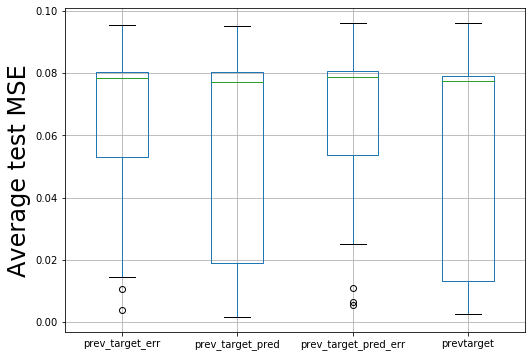

In [17]:
import matplotlib.pyplot as plt
df.boxplot([9], by=[4],figsize=(8,6))
#plt.xlabel("Number of training steps per task", fontsize=18)
plt.ylabel("Average test MSE",fontsize=24)
plt.title("")
plt.suptitle("")
plt.xlabel("")
#plt.yticks(fontsize=22)
#plt.xticks(fontsize=24)

In [20]:
pt = df[df[4] == "prevtarget"][8]
ptpe = df[df[4] == "prev_target_pred_err"][8]
ptp = df[df[4] == "prev_target_pred"][8]
pte = df[df[4] == "prev_target_err"][8]

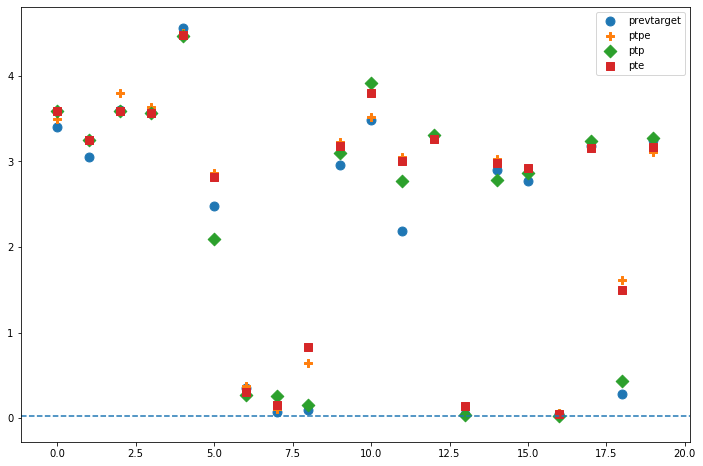

In [37]:
plt.figure(figsize=(12,8))
plt.scatter(np.arange(len(pt)), pt, label="prevtarget", marker='o', s=80)
plt.scatter(np.arange(len(pt)), ptpe, label="ptpe", marker='P', s=80)
plt.scatter(np.arange(len(pt)), ptp, label="ptp", marker='D', s=80)
plt.scatter(np.arange(len(pt)), pte, label="pte", marker='s', s=80)
plt.axhline(0.02795232649506453, linestyle='--')
plt.legend()

In [47]:
pt = df[df[4] == "prevtarget"][8].min()
ptpe = df[df[4] == "prev_target_pred_err"][8].min()
ptp = df[df[4] == "prev_target_pred"][8].min()
pte = df[df[4] == "prev_target_err"][8].min()

In [51]:
pt = list(df[df[4] == "prevtarget"][9])[np.argmin(list(df[df[4] == "prevtarget"][8]))]
ptpe = list(df[df[4] == "prev_target_pred_err"][9])[np.argmin(list(df[df[4] == "prev_target_pred_err"][8]))]
ptp = list(df[df[4] == "prev_target_pred"][9])[np.argmin(list(df[df[4] == "prev_target_pred"][8]))]
pte = list(df[df[4] == "prev_target_err"][9])[np.argmin(list(df[df[4] == "prev_target_err"][8]))]

**Best performances**

In [48]:
pt,ptp,pte,ptpe

(0.04488647028609311,
 0.027696312326840854,
 0.049836197438999044,
 0.05682488238639292)

**Confidence intervals**

In [52]:
pt,ptp,pte,ptpe

(0.0028968208119193317,
 0.0015534571514226846,
 0.003877340794544576,
 0.010881503719748518)

In [57]:
df.sort_values(8).iloc[0][7]

'0.004673978383086751'

**Best configuration for all:**
${Hs[i]} ${Ts[i]} $loss ${Mbs[i]} ${Nlayers[i]} ${Lrs[i]}

Hidden size: 40
T: 4
MBS: 4
Num layers: 2
Learning rate: 0.004673978383086751




## Run the best on 10- and 20-shot


python -u main.py --problem sine --model simplelstm --N 1 --k $1 --k_test 50 --runs 3 --val_after 2500 --cpu --hidden_size 40 --T 4 --validate --loss_type post --meta_batch_size 4 --num_layers 2 --lr 0.004673978383086751 --model_spec bestsimplelstm-inputs-$2 --lstm_inputs $2


#!/bin/bash
Ls=("prevtarget" "prev_target_pred" "prev_target_err" "prev_target_pred_err")
Ks=(10 20)


for loss in ${Ls[@]}; do
for k in ${Ks[@]}; do
echo $k $loss
sbatch sinejob.slurm $k $loss
sleep 1
done
done

In [46]:
len(list(df[df[4] == "prevtarget"][8]))

20

In [ ]:
0.02795232649506453

In [3]:
len(technique.split("-"))

9

In [4]:
technique.split("-")

['simplelstm',
 'inputs',
 '8',
 '4',
 'prev_target_pred_err',
 '2',
 '3',
 '4.64820226097604e',
 '05']

In [2]:
s = "1 3 3 3 4 2 1 2 1 2 3 4 2 2 1 3 2 1 2 3 4 4"
len(s.split(" "))

22

# OPLSTM on sine wave search


**Using best MAML architecture**
python -u main.py --problem sine --model oplstm --second_order --N 1 --k 5 --k_test 50 --runs 1 --val_after 2500 --cpu --validate --meta_batch_size $2 --lr $3 --model_spec oplstm-150h-$1_$2_$3 --layers 5,5,1 --hidden_size 1 --T $1 --seed 0 --elwise --learn_init_weight --lstm_inputs target_pred --hdims [150,150,150]  --gamma 0.025



python -u main.py --problem sine --model oplstm --second_order --N 1 --k 5 --k_test 50 --runs 1 --val_after 2500 --cpu --validate --meta_batch_size $2 --lr $3 --model_spec oplstm-70k-$1_$2_$3 --layers 5,5,1 --hidden_size 1 --T $1 --seed 0 --elwise --learn_init_weight --lstm_inputs target_pred --hdims [91,91,91]  --gamma 0.025

[91,91,91]


#!/bin/bash

Ts=(9 9 11 3 4 9 5 9 14 4 6 10 5 4 4 6 13 5 11 8 1 1)
Lrs=(0.0010448688371510757 1.3254610570097222e-05 0.00016098550271858659 0.00776573116016386 0.004673978383086751 0.007002448809789397 0.00023584798464763238 0.00010914286603608817 3.216361796021737e-05 4.64820226097604e-05 0.0006538281143115779 0.004321072194838596 2.8585518456486535e-05 0.002770576962134859 0.028790052229093227 0.0027719328599832087 9.011400868236316e-05 2.092886487381084e-05 0.00010893507255537653 0.005462569008912091 0.001 0.001)
Mbs=(1 3 3 3 4 2 1 2 1 2 3 4 2 2 1 3 2 1 2 3 4 4)



for i in $(seq 0 21)
do
echo ${Ts[i]} ${Mbs[i]} ${Lrs[i]}
sbatch sinejob.slurm ${Ts[i]} ${Mbs[i]} ${Lrs[i]}
sleep 1
done
      

${Ts[i]} ${Lrs[i]} ${Mbs[i]} 

In [6]:
" ".join([str(100000*int(x)//60000) for x in "60000 60000 60000 60000 240000 240000 240000 240000 480000 480000 480000 480000 960000 960000 960000 960000 1920000 1920000 1920000 1920000".split()])

'100000 100000 100000 100000 400000 400000 400000 400000 800000 800000 800000 800000 1600000 1600000 1600000 1600000 3200000 3200000 3200000 3200000'

In [31]:
import os
import numpy as np
import pandas as pd

from copy import deepcopy

PATH = "./N1k5test50/"

techniques = [x for x in os.listdir(PATH) if "oplstm-150h" in x]
print(techniques)
tpaths = [PATH + x for x in techniques]

RES = []
best_perf = None
best_technique = None
LOSS = dict()
for technique, tdir in zip(techniques, tpaths):
    if technique.count('_') < 2:
        continue
    tfile = tdir + "/-runs/" 
    try:
        tfile = tfile + [x for x in os.listdir(tfile) if "-curves" in x][0]
    except:
        print(f"No test perf file found for {technique}")
        continue
    
    data = pd.read_csv(tfile, header=None).to_numpy().reshape(-1)
    mean_perf, std_perf = data.min(), data.std()
    if best_perf is None:
        best_perf = mean_perf
        best_technique = technique
    elif mean_perf < best_perf:
        best_perf = mean_perf
        best_technique = technique
    
    print(technique, mean_perf)
    
    

['oplstm-150h-1-100000', 'oplstm-150h-1-1600000', 'oplstm-150h-1-3200000', 'oplstm-150h-1-400000', 'oplstm-150h-1-800000', 'oplstm-150h-10-100000', 'oplstm-150h-10-1600000', 'oplstm-150h-10-3200000', 'oplstm-150h-10-400000', 'oplstm-150h-10-800000', 'oplstm-150h-10_4_0.004321072194838596', 'oplstm-150h-11_2_0.00010893507255537653', 'oplstm-150h-11_3_0.00016098550271858659', 'oplstm-150h-13_2_9.011400868236316e-05', 'oplstm-150h-14_1_3.216361796021737e-05', 'oplstm-150h-1_4_0.001', 'oplstm-150h-3-100000', 'oplstm-150h-3-1600000', 'oplstm-150h-3-3200000', 'oplstm-150h-3-400000', 'oplstm-150h-3-800000', 'oplstm-150h-3_3_0.00776573116016386', 'oplstm-150h-4_1_0.028790052229093227', 'oplstm-150h-4_2_0.002770576962134859', 'oplstm-150h-4_2_4.64820226097604e-05', 'oplstm-150h-4_4_0.004673978383086751', 'oplstm-150h-5-100000', 'oplstm-150h-5-1600000', 'oplstm-150h-5-3200000', 'oplstm-150h-5-400000', 'oplstm-150h-5-800000', 'oplstm-150h-5_1_0.00023584798464763238', 'oplstm-150h-5_1_2.0928864873

In [4]:
best_perf, best_technique

(0.0200898631657473, 'oplstm-150h-5-800000')

**best: SINE WAVE: MBS=8, T=5**

python -u main.py --problem sine --model oplstm --second_order --N 1 --k 5 --k_test 50 --runs 1 --val_after 2500 --cpu --validate --meta_batch_size 8 --lr 0.000125 --model_spec oplstm-150h-best --layers 5,5,1 --hidden_size 1 --T 5 --seed 0 --elwise --learn_init_weight --lstm_inputs target_pred --hdims [150,150,150]  --gamma 0.025




## Find best sequential currtarget (x_t, y_t)

python -u main.py --problem sine --model simplelstm --N 1 --k 5 --k_test 50 --runs 3 --val_after 2500 --cpu --hidden_size $1 --T $2 --validate --loss_type post --meta_batch_size $4 --num_layers $5 --lr $6 --model_spec simplelstm-inputs-$1-$2-$3-$4-$5-$6 --lstm_inputs $3


${Hs[i]} ${Ts[i]} $loss ${Mbs[i]} ${Nlayers[i]} ${Lrs[i]}

#!/bin/bash

Ts=(9 9 11 3 4 9 5 9 14 4 6 10 5 4 4 6 13 5 11 8 1 1)
Lrs=(0.0010448688371510757 1.3254610570097222e-05 0.00016098550271858659 0.00776573116016386 0.004673978383086751 0.007002448809789397 0.00023584798464763238 0.00010914286603608817 3.216361796021737e-05 4.64820226097604e-05 0.0006538281143115779 0.004321072194838596 2.8585518456486535e-05 0.002770576962134859 0.028790052229093227 0.0027719328599832087 9.011400868236316e-05 2.092886487381084e-05 0.00010893507255537653 0.005462569008912091 0.001 0.001)
Nlayers=(4 1 4 3 2 4 1 1 3 3 3 4 2 4 2 1 1 3 3 3 3 4)
Mbs=(1 3 3 3 4 2 1 2 1 2 3 4 2 2 1 3 2 1 2 3 4 4)
Hs=(3 1 1 8 40 20 1 3 40 8 20 40 40 1 3 1 40 3 20 20 40 40)
Ls=("currtarget")



for loss in ${Ls[@]}; do
for i in $(seq 0 21)
do
echo ${Hs[i]} ${Ts[i]} $loss ${Mbs[i]} ${Nlayers[i]} ${Lrs[i]}
#sbatch sinejob.slurm ${Hs[i]} ${Ts[i]} $loss ${Mbs[i]} ${Nlayers[i]} ${Lrs[i]}
#sleep 1
done
done

In [1]:
import os
import numpy as np
import pandas as pd
import scipy.stats as st

from copy import deepcopy


for PATH in ["./N1k5test50/"]:
    print('-'*40)
    print(PATH)
    

    techniques = [x for x in os.listdir(PATH) if "currtarget" in x]
    tpaths = [PATH + x for x in techniques]
    
    
    rows = []
    
    
    RES = []
    LOSS = dict()
    best_perf = float("inf")
    best_technique = None
    best_ci = None
    for technique, tdir in zip(techniques, tpaths):
        tfile = tdir + "/-runs/" 
        try:
            tfile = tfile + [x for x in os.listdir(tfile) if "alltestperf" in x][0]
        except:
            print(f"No test perf file found for {technique}")
            continue

        data = pd.read_csv(tfile, header=None).to_numpy().reshape(-1)
        mean_perf, std_perf = data.mean(), data.std()
        a = data
        lb, ub = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
        ci = a.mean() - lb
        
        if mean_perf < best_perf:
            best_perf = mean_perf
            best_ci = ci
            best_technique = technique

        print(technique, '\t', mean_perf, '\t', ci)
    

----------------------------------------
./N1k5test50/
simplelstm-inputs-1-11-currtarget-3-4-0.00016098550271858659 	 3.3506651782914996 	 0.07741568038363544
simplelstm-inputs-1-4-currtarget-2-4-0.002770576962134859 	 2.9772221492677926 	 0.06861818541034692
simplelstm-inputs-1-5-currtarget-1-1-0.00023584798464763238 	 3.4683750176653265 	 0.07756157653738738
simplelstm-inputs-1-6-currtarget-3-1-0.0027719328599832087 	 3.402181957518061 	 0.07549369679622187
simplelstm-inputs-1-9-currtarget-3-1-1.3254610570097222e-05 	 4.558977661843101 	 0.09603907898685993
simplelstm-inputs-20-11-currtarget-2-3-0.00010893507255537653 	 0.6251905604656786 	 0.02349724632392014
simplelstm-inputs-20-6-currtarget-3-3-0.0006538281143115779 	 0.2695868224601533 	 0.010769648867869519
simplelstm-inputs-20-8-currtarget-3-3-0.005462569008912091 	 0.08199711739369858 	 0.006505786925813634
simplelstm-inputs-20-9-currtarget-2-4-0.007002448809789397 	 0.08659505565610012 	 0.0066792960139513136
simplelstm-input

In [2]:
best_technique, best_perf, best_ci

('simplelstm-inputs-40-4-currtarget-4-2-0.004673978383086751',
 0.05360906261992928,
 0.008642246032642395)

# Compare Batch & Sequence

**best config**

- hidden size:40
- T: 4
- input type: currtarget
- MBS: 4
- num_layers:2
- lr: 0.004673978383086751

**k:** 5,10,20,30,40,50


**Sequential:** python -u main.py --problem sine --model simplelstm --N 1 --k $1 --k_test 50 --runs 3 --val_after 2500 --cpu --hidden_size 40 --T 4 --validate --loss_type post --meta_batch_size 4 --num_layers 2 --lr 0.004673978383086751 --model_spec bestsimplelstm-sequential --lstm_inputs currtarget 

**Batch:** python -u main.py --problem sine --model simplelstm --N 1 --k $1 --k_test 50 --runs 3 --val_after 2500 --cpu --hidden_size 40 --T 4 --validate --loss_type post --meta_batch_size 4 --num_layers 2 --lr 0.004673978383086751 --model_spec bestsimplelstm-batch



In [13]:
import os
import numpy as np
import pandas as pd
import scipy.stats as st

from copy import deepcopy



data_batch = []
data_seq = []
perfs_batch = []
perfs_seq = []
cis_batch = []
cis_seq = []
cis_run_batch = []
cis_run_seq = []

ks = [5,10,20,30,40,50]
for k in ks:
    PATH =  f"./N1k{k}test50/"
    print('-'*40)
    print(PATH)
    

    techniques = [x for x in os.listdir(PATH) if "-sequential" in x or "-batch" in x]
    tpaths = [PATH + x for x in techniques]
    
    
    rows = []
    
    
    RES = []
    LOSS = dict()
    best_perf = float("inf")
    best_technique = None
    best_ci = None
    for technique, tdir in zip(techniques, tpaths):
        tfile = tdir + "/-runs/" 
        try:
            tefile = [tfile +x for x in os.listdir(tfile) if "test_scores" in x]
            tfile = [tfile +x for x in os.listdir(tfile) if "alltestperf" in x]
        except Exception as e:
            print(f"No test perf file found for {technique}")
            print(e)
            continue

        data = np.array([pd.read_csv(t, header=None).to_numpy().reshape(-1) for t in tfile]).reshape(-1)
        dfs = [pd.read_csv(t) for t in tefile][0]["mean_loss"]
        
        
        mean_perf, std_perf = data.mean(), data.std()
        a = data
        
        means = np.array(dfs)
        print(means)
        lbr, ubr = st.t.interval(0.95, len(means)-1, loc=np.mean(means), scale=st.sem(means))
        cir = means.mean() - lbr
        
        
        lb, ub = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
        ci = a.mean() - lb
        
        if "-batch" in technique:
            ls = perfs_batch
            cis = cis_batch
            data_batch.append(data)
            cis_run_batch.append(cir)
            print(cir)
        else:
            ls = perfs_seq
            cis = cis_seq
            data_seq.append(data)
            cis_run_seq.append(cir)
        
        ls.append(mean_perf)
        cis.append(ci)

        print(k, '\t', technique, '\t', mean_perf, '\t', ci)
    

----------------------------------------
./N1k5test50/
[0.0297629  0.04956035 0.04248492]
0.024920965647746134
5 	 bestsimplelstm-batch 	 0.0406027239124135 	 0.002327291732055946
[0.05278656 0.05520005 0.05284058]
5 	 bestsimplelstm-sequential 	 0.05360906261992928 	 0.008642246032642395
----------------------------------------
./N1k10test50/
[0.01632485 0.01402588 0.01207468]
0.005284887744782644
10 	 bestsimplelstm-batch 	 0.014141800765898807 	 0.0006994603523455441
[0.01489168 0.01558726 0.02269871]
10 	 bestsimplelstm-sequential 	 0.017725885150755204 	 0.001000698511657315
----------------------------------------
./N1k20test50/
[0.00642527 0.00684974 0.00624599]
0.0007702374458421245
20 	 bestsimplelstm-batch 	 0.0065070019024908825 	 0.00020963034232713423
[0.00774173 0.00877381 0.00750603]
20 	 bestsimplelstm-sequential 	 0.008007191189436174 	 0.0002509127877157562
----------------------------------------
./N1k30test50/
[0.00663234 0.00600651 0.00653388]
0.0008359635198624529

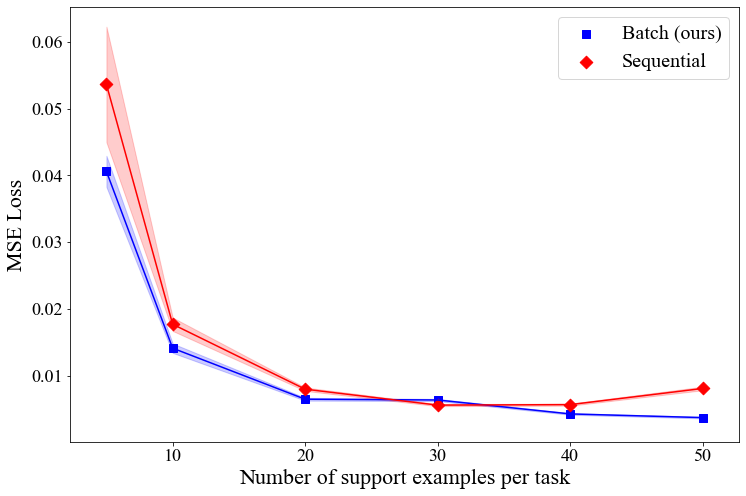

In [4]:
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Times New Roman']})
rc('text', usetex=False)


perfs_batch, perfs_seq = np.array(perfs_batch), np.array(perfs_seq)


plt.figure(figsize=(12,8))
plt.xlabel("Number of support examples per task", fontsize=22)
plt.ylabel("MSE Loss", fontsize=22)
plt.plot(ks, perfs_batch, color='blue')
plt.plot(ks, perfs_seq, color='red')
plt.fill_between(ks, perfs_batch - cis_batch, perfs_batch + cis_batch, alpha=0.2, color='blue')
plt.fill_between(ks, perfs_seq - cis_seq, perfs_seq + cis_seq, alpha=0.2, color='red')
plt.scatter(ks, perfs_batch, color='blue', marker="s", label="Batch (ours)", s=80)
plt.scatter(ks, perfs_seq, color='red', marker="D", label="Sequential", s=80)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=20)
plt.savefig("batch-vs-seq.pdf")
#plt.yscale('log')
plt.show()

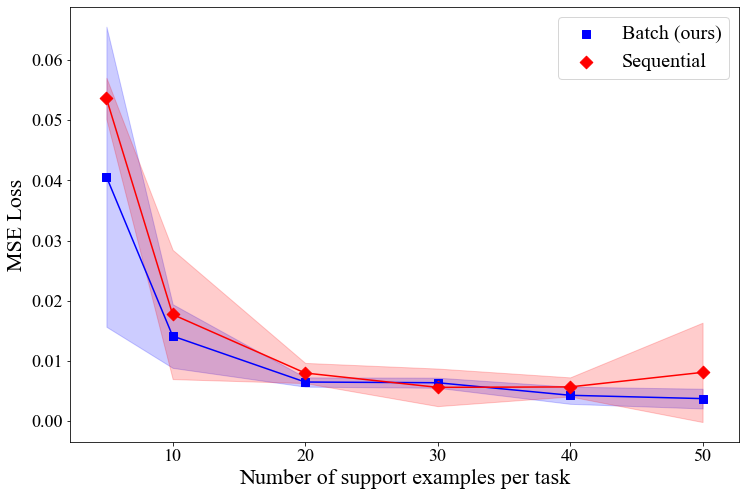

In [16]:
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Times New Roman']})
rc('text', usetex=False)


perfs_batch, perfs_seq = np.array(perfs_batch), np.array(perfs_seq)


plt.figure(figsize=(12,8))
plt.xlabel("Number of support examples per task", fontsize=22)
plt.ylabel("MSE Loss", fontsize=22)
plt.plot(ks, perfs_batch, color='blue')
plt.plot(ks, perfs_seq, color='red')
plt.fill_between(ks, perfs_batch - cis_run_batch, perfs_batch + cis_run_batch, alpha=0.2, color='blue')
plt.fill_between(ks, perfs_seq - cis_run_seq, perfs_seq + cis_run_seq, alpha=0.2, color='red')
plt.scatter(ks, perfs_batch, color='blue', marker="s", label="Batch (ours)", s=80)
plt.scatter(ks, perfs_seq, color='red', marker="D", label="Sequential", s=80)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=20)
plt.savefig("batch-vs-seq-confoverruns.pdf")
#plt.yscale('log')
plt.show()

In [8]:
perfs_batch

array([0.04060272, 0.0141418 , 0.006507  , 0.00639091, 0.0043059 ,
       0.00375447])

**not all data in yet for k=30**

In [20]:
improvements = [100*(data_batch[i] - data_seq[i])/data_seq[i] for i in range(len(data_seq))]
imprv_cis = [improvements[i].mean() - st.t.interval(0.95, len(improvements[i])-1, loc=np.mean(improvements[i]), scale=st.sem(improvements[i]))[0] for i in range(len(data_seq))]


In [21]:
imprv_cis

[6.533596598374949,
 6.132862874446417,
 4.288163943916363,
 5.973632557916574,
 4.847413709048915,
 2.78446963582393]

[]

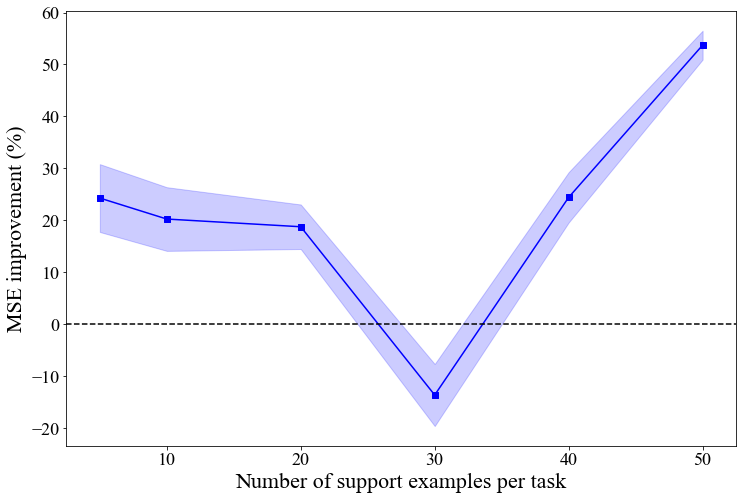

In [28]:
perfs_seq = np.array(perfs_seq)
perfs_batch = np.array(perfs_batch)
plt.figure(figsize=(12,8))
plt.xlabel("Number of support examples per task", fontsize=22)
plt.ylabel("MSE improvement (%)", fontsize=22)
plt.plot(ks, 100*(perfs_seq - perfs_batch)/perfs_seq, color='blue')
plt.fill_between(ks, 100*(perfs_seq - perfs_batch)/perfs_seq - np.array(imprv_cis), 100*(perfs_seq - perfs_batch)/perfs_seq + np.array(imprv_cis), color='blue', alpha=0.2)
plt.scatter(ks, 100*(perfs_seq - perfs_batch)/perfs_seq, color='blue', marker="s")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
#plt.legend(fontsize=20)
plt.axhline(0, linestyle='--', color='black')
plt.savefig("batch-vs-seq-improvmeent.pdf")

plt.plot()


### MAML + OP-LSTM

**MAML:**

python -u main.py --problem sine --model maml --second_order --N 1 --k $1 --k_test 50 --runs 3 --val_after 2500 --cpu --T 14 --validate --meta_batch_size 2 --lr 0.0032937018686863585 --base_lr 0.003769030557807799 --model_spec somaml-best-hsize91 --hdims [91,91,91]

**best OPLSTM**

python -u main.py --problem sine --model oplstm --second_order --N 1 --k $1 --k_test 50 --runs 3 --val_after 2500 --cpu --validate --meta_batch_size 1 --lr 0.0010448688371510757 --model_spec oplstm-70k-best --layers 5,5,1 --hidden_size 1 --T 9 --elwise --learn_init_weight --lstm_inputs target_pred --hdims [91,91,91]  --gamma 0.025

oplstm-70k-9_1_0.0010448688371510757


In [7]:
import os
import numpy as np
import pandas as pd
import scipy.stats as st

from copy import deepcopy

ks=[5,10,20]
for k in ks:
    PATH = f"./N1k{k}test50/"
    print('k=', k)
    techniques = [x for x in os.listdir(PATH) if x=="oplstm-70k-best" or "somaml-best-hsize91"==x]
    tpaths = [PATH + x for x in techniques]

    RES = []
    LOSS = dict()
    for technique, tdir in zip(techniques, tpaths):
        tfile = tdir + "/-runs/" 
        try:
            tfile = tfile + [x for x in os.listdir(tfile) if "alltestperf" in x][0]
        except:
            print(f"No test perf file found for {technique}")
            continue

        data = pd.read_csv(tfile, header=None).to_numpy().reshape(-1)
        mean_perf, std_perf = data.mean(), data.std()
        a = data
        lb, ub = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
        ci = a.mean() - lb

        print(technique, mean_perf, ci)
    print('-'*40)
    

k= 5
oplstm-70k-best 0.10540017640795361 0.009046934041056318
somaml-best-hsize91 0.17653166841748558 0.009424709234501755
----------------------------------------
k= 10
oplstm-70k-best 0.007567328537161858 0.0007291992200608808
somaml-best-hsize91 0.032948145922263646 0.0029543869715054037
----------------------------------------
k= 20
oplstm-70k-best 0.002690515086822366 0.00015408945801454995
somaml-best-hsize91 0.004867439069036917 0.0005119710979965796
----------------------------------------
